In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import sys

import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('D:/ML Projects/Telecom Churning/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
df.head().transpose()

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [4]:
df.shape

(7043, 21)

In [5]:
df[df.columns].dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [6]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6534
Churn                  2
dtype: int64

In [9]:
df=df.drop('customerID',axis=1)

<AxesSubplot:xlabel='Churn', ylabel='count'>

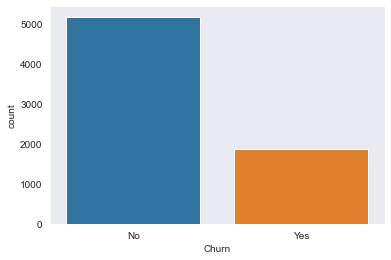

In [10]:
sns.set_style('dark')
sns.countplot(x='Churn',data=df)

In [11]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [12]:
df['Churn'].value_counts(normalize = True)*100

No     73.463013
Yes    26.536987
Name: Churn, dtype: float64

Since the proportion of minority lies between 20-40% the degree of imbalance is mild.
Its good to continue with the data.

In [13]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.798992
std,0.368612,24.559481,30.090047,2266.730170
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [14]:
df['Churn']=np.where(df['Churn']=="Yes",1,0)

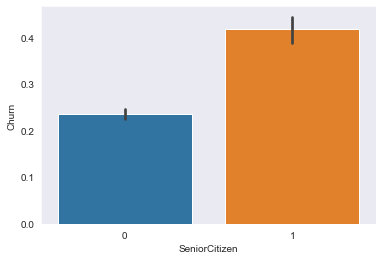

In [15]:
from numpy import mean

#plt.figure(figsize=(15,4))
sns.barplot(x='SeniorCitizen', y='Churn',data=df, estimator=mean )
plt.show()

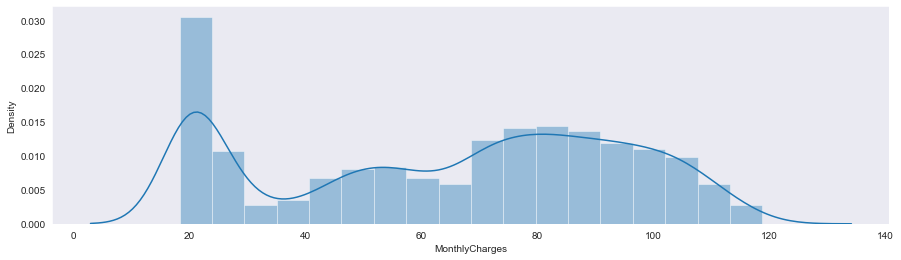

In [16]:
plt.figure(figsize=(15,4))
#sns.barplot(x='MonthlyCharges',data=df )
sns.distplot(df['MonthlyCharges'])
plt.show()

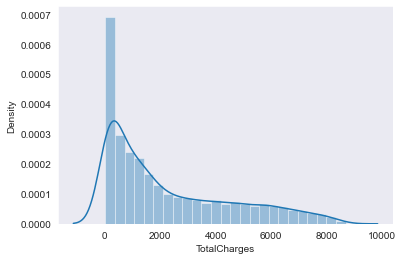

In [17]:
sns.distplot(df['TotalCharges'])
plt.show()

In [18]:
df_cat = df.select_dtypes(include=['object'])
df_cat.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check
1,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check
2,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check
3,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic)
4,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check


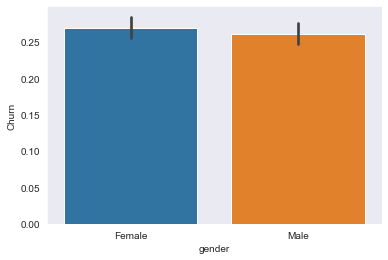

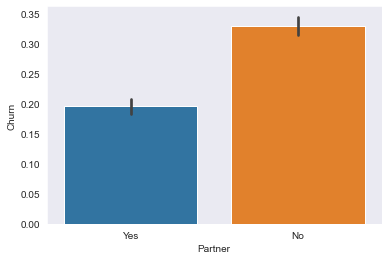

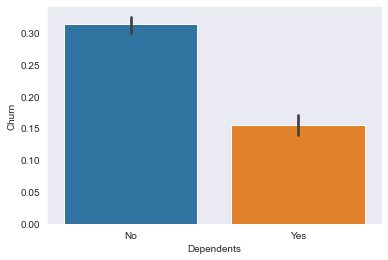

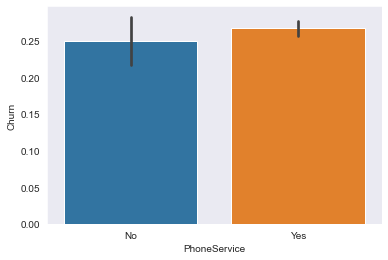

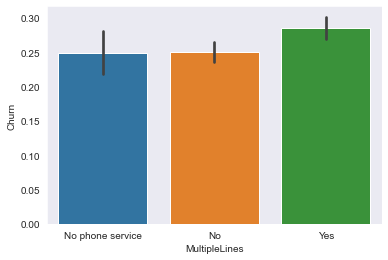

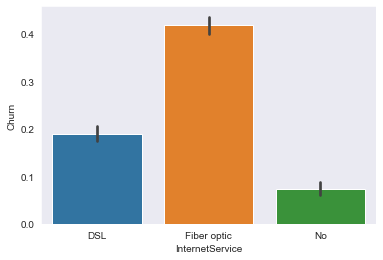

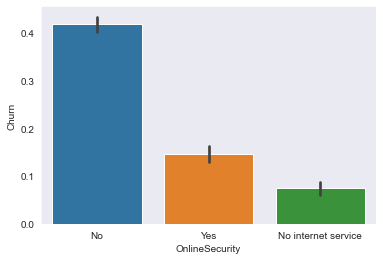

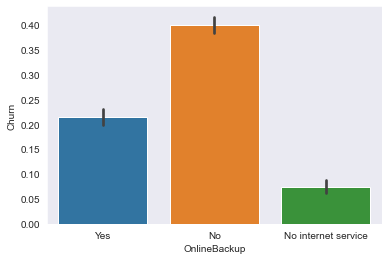

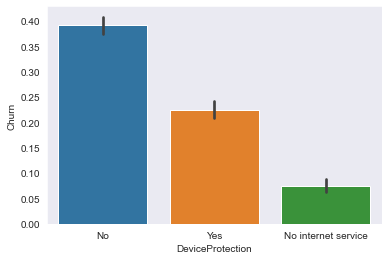

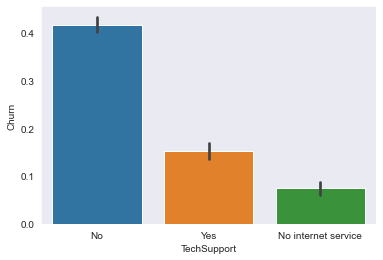

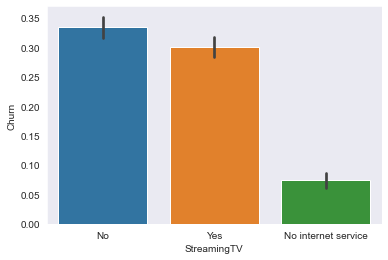

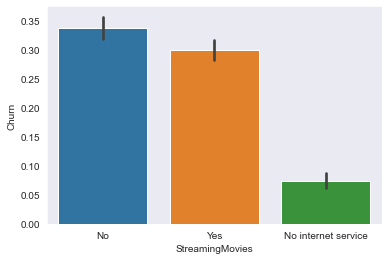

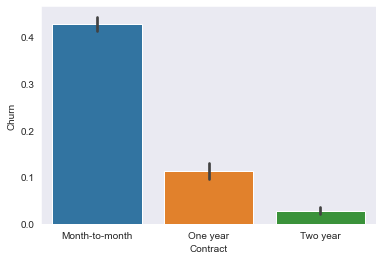

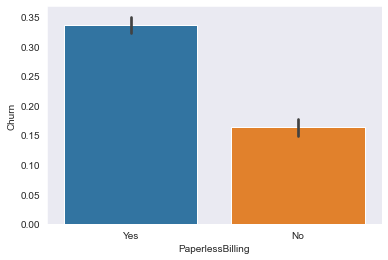

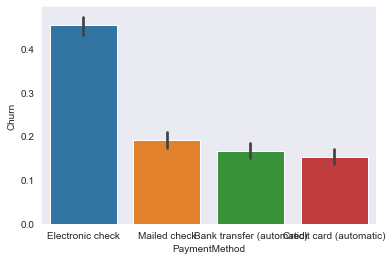

In [19]:
df_Temp=pd.concat([df['Churn'],df_cat],axis=1,join='inner')

from numpy import mean
for col in (df_cat.columns):
    plt.figure()
    sns.barplot(x=col, y="Churn",data=df_Temp, estimator=mean )
plt.show()

In [20]:
# Inference:
#     -People who have partners & dependents are more likely to stay.
#     -People who have fiber Optic internet,Streaming TV & Streaming Movies are moke likely to churn.
#     -People who doen't have online security, Online backup, Device protection & Tech support are moke likely to churn.
#     -People having monthly contracts are more likely to churn
    

In [21]:
#Applying Label Encoding for object to numeric conversion

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for x in df_cat.columns:
    df_cat[x] = le.fit_transform(df_cat[x])
df_cat.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2
1,1,0,0,1,0,0,2,0,2,0,0,0,1,0,3
2,1,0,0,1,0,0,2,2,0,0,0,0,0,1,3
3,1,0,0,0,1,0,2,0,2,2,0,0,1,0,0
4,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2


In [22]:
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   gender            7043 non-null   int32
 1   Partner           7043 non-null   int32
 2   Dependents        7043 non-null   int32
 3   PhoneService      7043 non-null   int32
 4   MultipleLines     7043 non-null   int32
 5   InternetService   7043 non-null   int32
 6   OnlineSecurity    7043 non-null   int32
 7   OnlineBackup      7043 non-null   int32
 8   DeviceProtection  7043 non-null   int32
 9   TechSupport       7043 non-null   int32
 10  StreamingTV       7043 non-null   int32
 11  StreamingMovies   7043 non-null   int32
 12  Contract          7043 non-null   int32
 13  PaperlessBilling  7043 non-null   int32
 14  PaymentMethod     7043 non-null   int32
dtypes: int32(15)
memory usage: 412.8 KB


In [23]:
df_cat=df_cat.drop(['gender','PhoneService','MultipleLines'],axis=1)

In [24]:
df_final = pd.concat([df.select_dtypes(include=['number']),df_cat],axis=1)

In [25]:
df_final.head().transpose()

,0,1,2,3,4
SeniorCitizen,0.00,0.00,0.00,0.00,0.00
tenure,1.00,34.00,2.00,45.00,2.00
MonthlyCharges,29.85,56.95,53.85,42.30,70.70
TotalCharges,29.85,1889.50,108.15,1840.75,151.65
Churn,0.00,0.00,1.00,0.00,1.00
Partner,1.00,0.00,0.00,0.00,0.00
Dependents,0.00,0.00,0.00,0.00,0.00
InternetService,0.00,0.00,0.00,0.00,1.00
OnlineSecurity,0.00,2.00,2.00,2.00,0.00
OnlineBackup,2.00,0.00,2.00,0.00,0.00


In [26]:
df_final.shape

(7043, 17)

<AxesSubplot:>

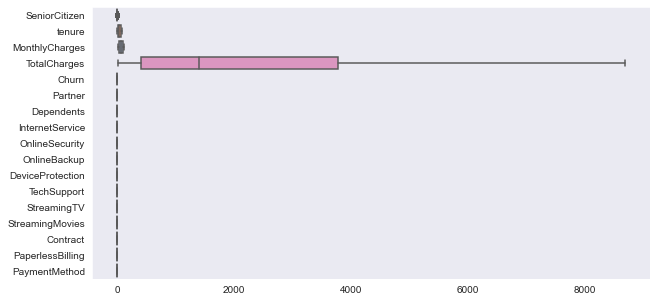

In [27]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df_final, orient="h", palette="Set2")

There are no outliers or Missing values in this dataset to treat

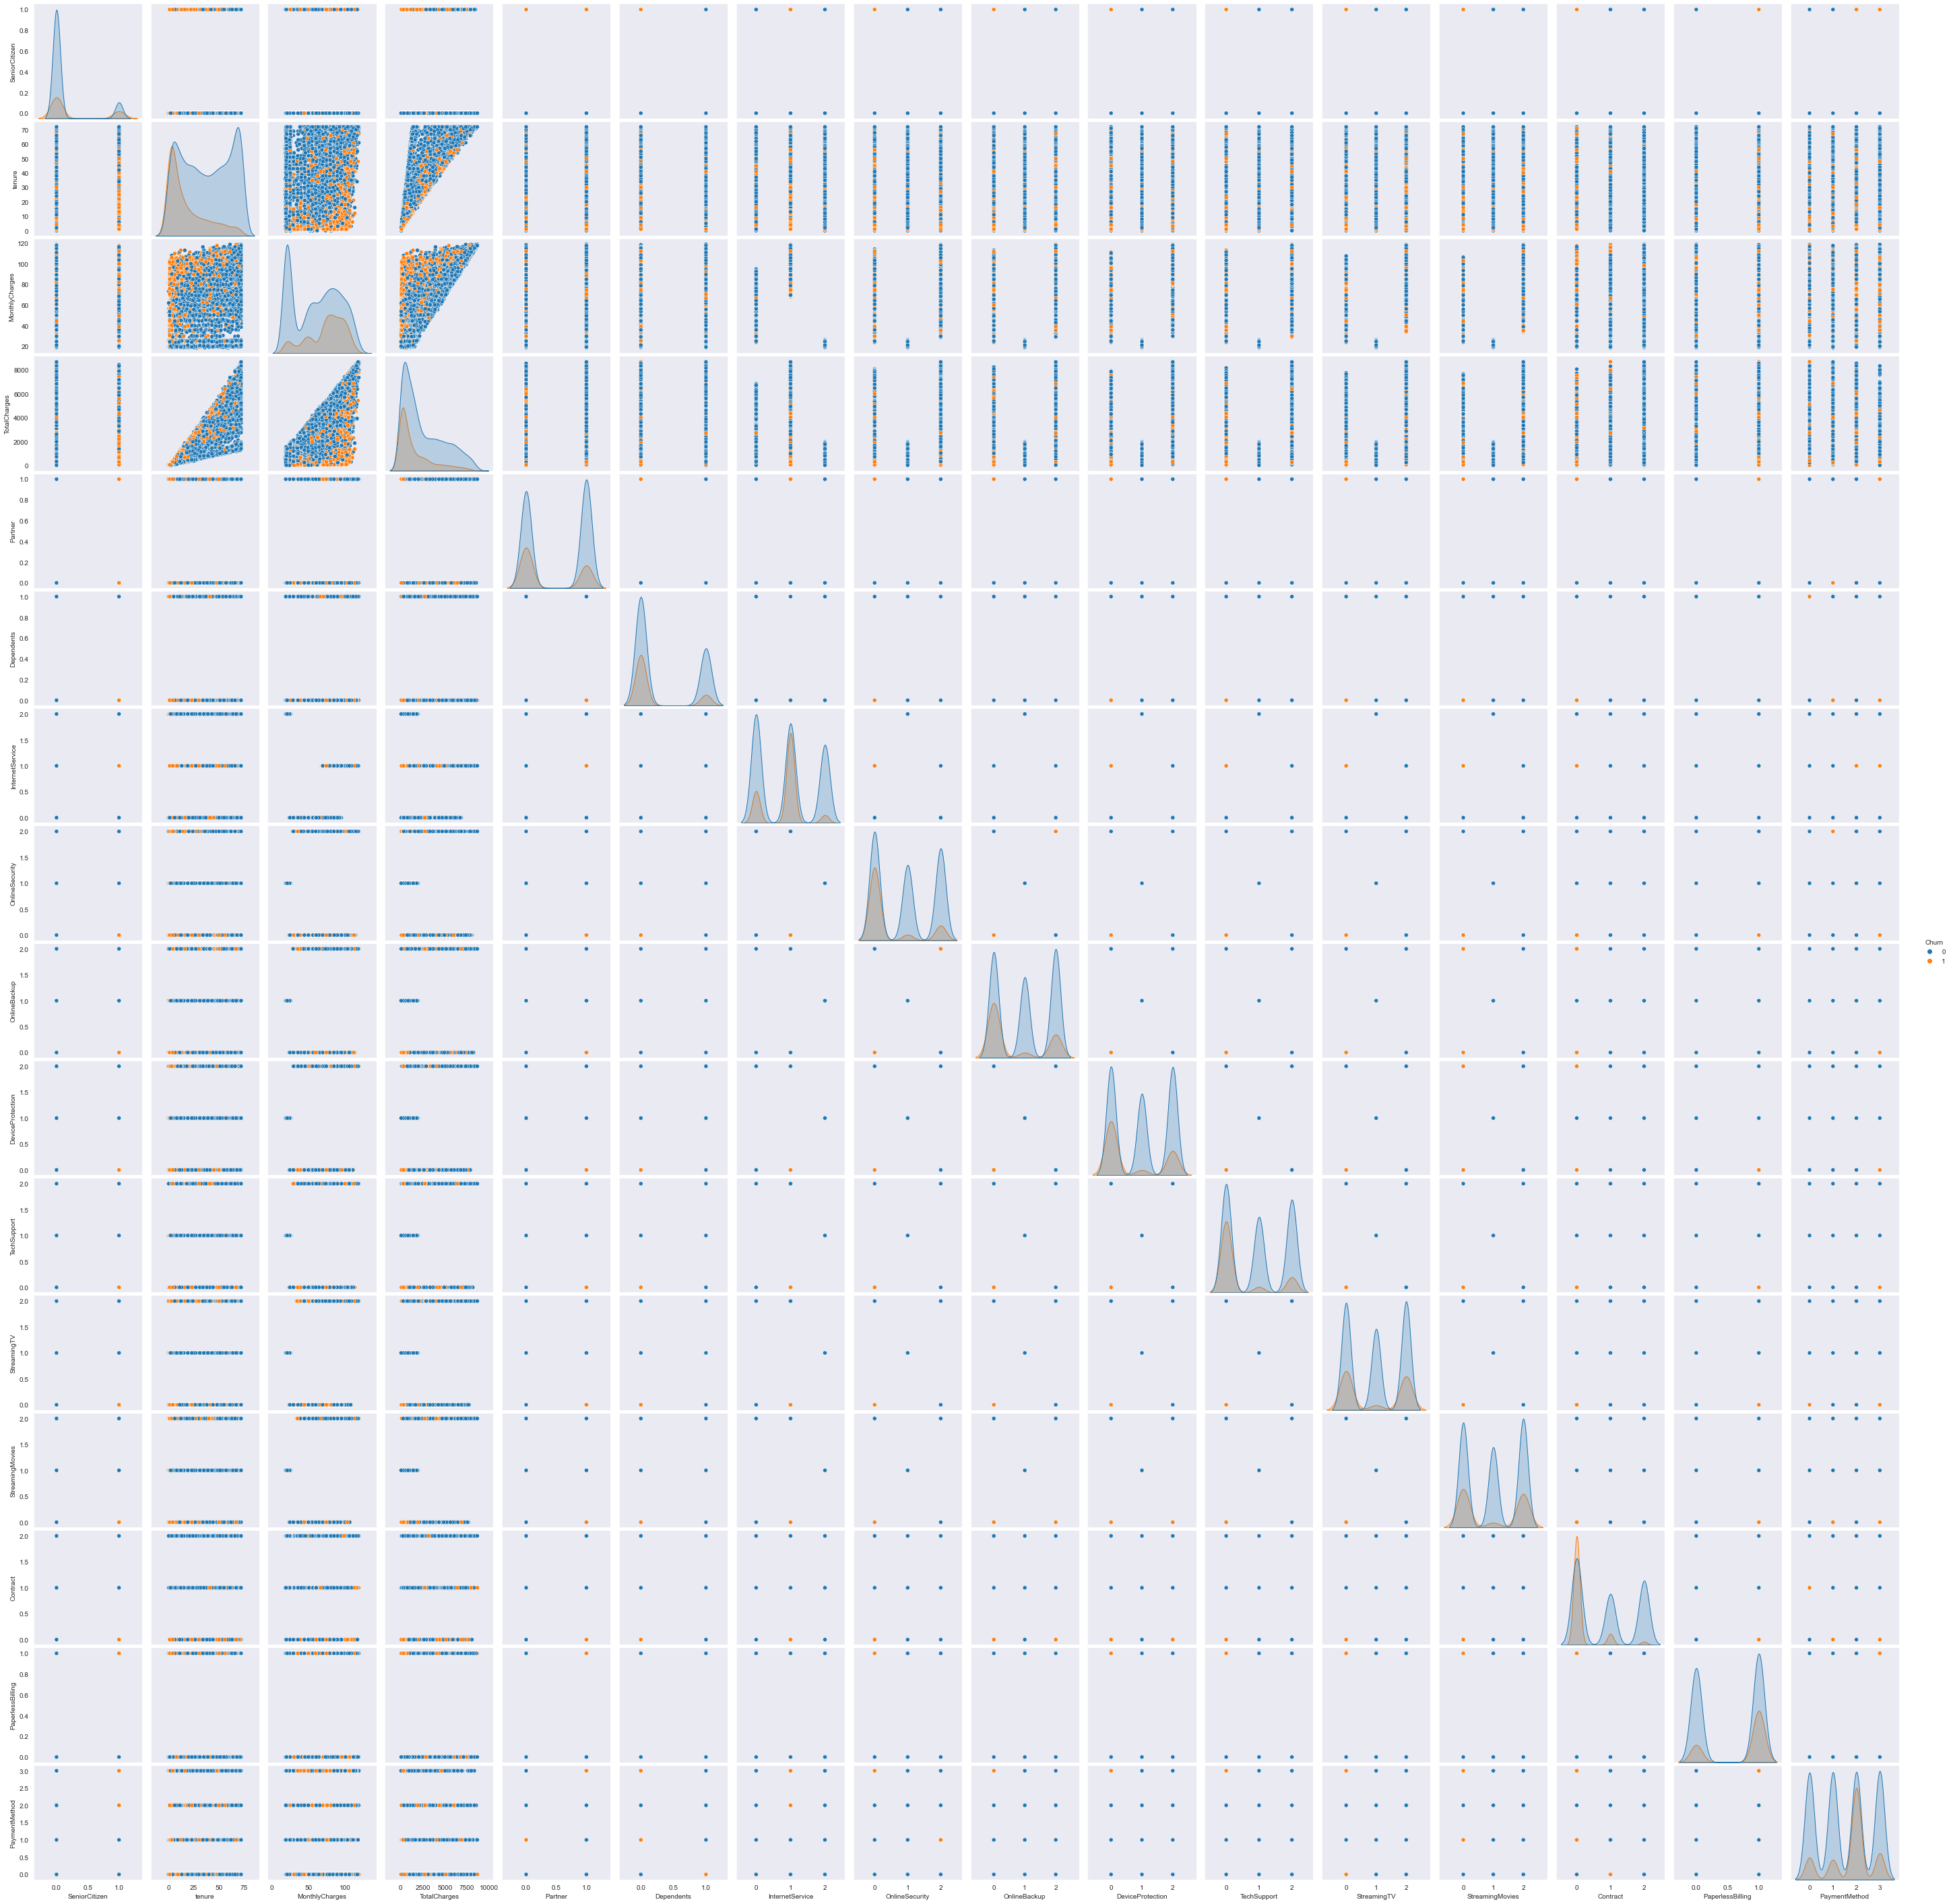

In [28]:
sns.pairplot(df_final,hue = 'Churn')

<AxesSubplot:>

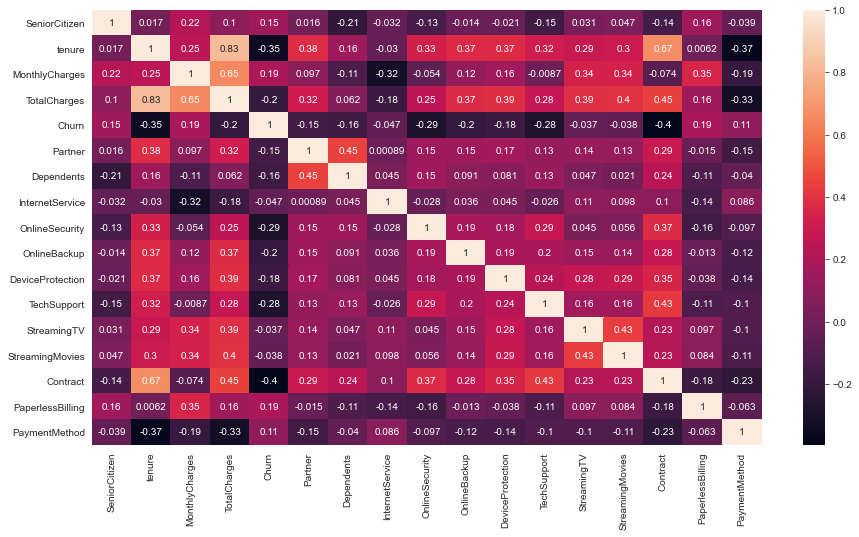

In [29]:
plt.figure(figsize=(15,8))
sns.heatmap(df_final.corr(),annot=True)

We can see that Monthly charges & Total charges, Tenure & Contract are highly correlated.
Multicollinearity may arise. Need to check VIF.

In [30]:
# Checking multicollinearity using VIF

import statsmodels.api as sm
features=list(df_final.columns)

Rsqr_Vif = []
for i in range(1, len(df_final.columns)):
    
    x=df_final.loc[:,df_final.columns!=features[i]]
    y=df_final.loc[:,df_final.columns==features[i]]
    model=sm.OLS(y,x)
    results=model.fit()

    rsq=results.rsquared
    vif=round(1/(1-rsq),2)
    
    Rsqr_Vif.append({'column':features[i],'Rsqr':rsq,'vif':vif})

rsq=pd.DataFrame(Rsqr_Vif)
rsq.transpose()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
column,tenure,MonthlyCharges,TotalCharges,Churn,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
Rsqr,0.928572,0.91304,0.923515,0.459751,0.64535,0.489526,0.625851,0.552522,0.593173,0.619568,0.578548,0.684915,0.687223,0.759646,0.653532,0.664756
vif,14.0,11.5,13.07,1.85,2.82,1.96,2.67,2.23,2.46,2.63,2.37,3.17,3.2,4.16,2.89,2.98


In [31]:
df_final=df_final.drop(['MonthlyCharges'], axis = 1)


In [32]:
# Checking multicollinearity using VIF

import statsmodels.api as sm
features=list(df_final.columns)

Rsqr_Vif = []
for i in range(1, len(df_final.columns)):
    
    x=df_final.loc[:,df_final.columns!=features[i]]
    y=df_final.loc[:,df_final.columns==features[i]]
    model=sm.OLS(y,x)
    results=model.fit()

    rsq=results.rsquared
    vif=round(1/(1-rsq),2)
    
    Rsqr_Vif.append({'column':features[i],'Rsqr':rsq,'vif':vif})

rsq=pd.DataFrame(Rsqr_Vif)
rsq.transpose()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
column,tenure,TotalCharges,Churn,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
Rsqr,0.926566,0.892066,0.376559,0.643327,0.48846,0.625634,0.548767,0.591774,0.617643,0.576165,0.678027,0.680193,0.754962,0.598138,0.61645
vif,13.62,9.26,1.6,2.8,1.95,2.67,2.22,2.45,2.62,2.36,3.11,3.13,4.08,2.49,2.61


In [33]:
df_final=df_final.drop(['tenure'], axis = 1)

In [34]:
# Checking multicollinearity using VIF

import statsmodels.api as sm
features=list(df_final.columns)

Rsqr_Vif = []
for i in range(1, len(df_final.columns)):
    
    x=df_final.loc[:,df_final.columns!=features[i]]
    y=df_final.loc[:,df_final.columns==features[i]]
    model=sm.OLS(y,x)
    results=model.fit()

    rsq=results.rsquared
    vif=round(1/(1-rsq),2)
    
    Rsqr_Vif.append({'column':features[i],'Rsqr':rsq,'vif':vif})

rsq=pd.DataFrame(Rsqr_Vif)
rsq.transpose()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
column,TotalCharges,Churn,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
Rsqr,0.77262,0.374722,0.634396,0.488118,0.601057,0.545133,0.589794,0.617589,0.576094,0.676105,0.678866,0.677195,0.594806,0.616223
vif,4.4,1.6,2.74,1.95,2.51,2.2,2.44,2.61,2.36,3.09,3.11,3.1,2.47,2.61


In [35]:
Y = df_final['Churn']
X = df_final.drop(['Churn'], axis = 1)

In [36]:
#Scaling the independent features before applying PCA

from sklearn.preprocessing import StandardScaler

scalar=StandardScaler()
scalar.fit(X)
scaled_df=scalar.transform(X)

In [37]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(scaled_df,Y,test_size=0.3, random_state=42)

In [38]:
from sklearn.linear_model import LogisticRegression

logreg=LogisticRegression(random_state=42)
logreg.fit(x_train,y_train)

LogisticRegression(random_state=42)

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

rf=RandomForestClassifier(random_state=42)
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto'],
    'max_depth' : [6,7,8],
    'criterion' :['gini', 'entropy']
}
CV_rfc = GridSearchCV(estimator=rf, param_grid=param_grid, cv= 5)
CV_rfc.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [6, 7, 8], 'max_features': ['auto'],
                         'n_estimators': [200, 500]})

In [40]:
CV_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 7,
 'max_features': 'auto',
 'n_estimators': 500}

In [41]:
rf=RandomForestClassifier(random_state=42, max_features='auto', n_estimators= 500, max_depth=7, criterion='gini')
rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=7, n_estimators=500, random_state=42)

In [42]:
# Building a Decision Tree Model
from sklearn.tree import DecisionTreeClassifier

dtree=DecisionTreeClassifier(criterion='gini',random_state=42,max_depth=7,min_samples_split=50)
dtree.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=7, min_samples_split=50, random_state=42)

In [44]:
# Building a Gradient Boosting Model
from sklearn.ensemble import GradientBoostingClassifier
gbm=GradientBoostingClassifier(criterion='mse',random_state=0,max_depth=6,min_samples_split=50)
gbm.fit(x_train,y_train)

GradientBoostingClassifier(criterion='mse', max_depth=6, min_samples_split=50,
                           random_state=0)

In [46]:
# Model Evaluation
y_pred_logreg=logreg.predict(x_test)
y_pred_rf=rf.predict(x_test)
y_pred_tree=dtree.predict(x_test)
y_pred_gbm=gbm.predict(x_test)

In [47]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_logreg))
print("Precision",metrics.precision_score(y_test,y_pred_logreg))
print("Recall",metrics.recall_score(y_test,y_pred_logreg))
print("f1_score",metrics.f1_score(y_test,y_pred_logreg))

Accuracy: 0.7709417889256981
Precision 0.6032110091743119
Recall 0.45818815331010454
f1_score 0.5207920792079208


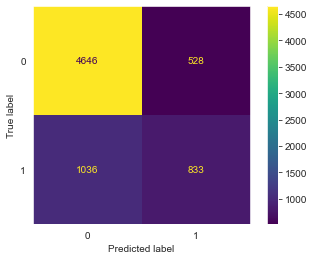

In [48]:
metrics.plot_confusion_matrix(logreg,scaled_df,Y)

In [49]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_tree))
print("Precision",metrics.precision_score(y_test,y_pred_tree))
print("Recall",metrics.recall_score(y_test,y_pred_tree))
print("f1_score",metrics.f1_score(y_test,y_pred_tree))

Accuracy: 0.7780407004259347
Precision 0.6039603960396039
Recall 0.5313588850174216
f1_score 0.5653382761816496


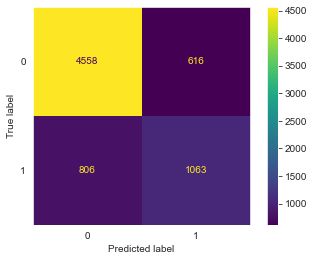

In [50]:
metrics.plot_confusion_matrix(dtree,scaled_df,Y)

In [51]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_rf))
print("Precision",metrics.precision_score(y_test,y_pred_rf))
print("Recall",metrics.recall_score(y_test,y_pred_rf))
print("f1_score",metrics.f1_score(y_test,y_pred_rf))

Accuracy: 0.7941315664931378
Precision 0.6699266503667481
Recall 0.47735191637630664
f1_score 0.5574771108850458


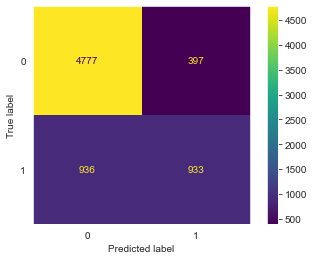

In [52]:
metrics.plot_confusion_matrix(rf,scaled_df,Y)

In [53]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_gbm))
print("Precision",metrics.precision_score(y_test,y_pred_gbm))
print("Recall",metrics.recall_score(y_test,y_pred_gbm))
print("f1_score",metrics.f1_score(y_test,y_pred_gbm))

Accuracy: 0.7950780880265026
Precision 0.6529284164859002
Recall 0.524390243902439
f1_score 0.5816425120772947


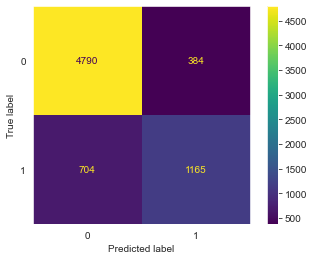

In [54]:
metrics.plot_confusion_matrix(gbm,scaled_df,Y)

In [ ]:
# Project Conclusion :- 
# The GBM Model has performed the best and will be used for Customer targeting with Loan offers
# Since Monthly Income and Existing EMI are the most important features for the GBM model
# We will build a Business Value Metric based on Existing EMI/Monthly Income
# Low Values of this ratio will indicate valueable customers
# Within the High Value group, we can leverage the model to identify the best targets